In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
X_pca=pd.read_excel(r"PCA_data.xlsx")
df=pd.read_excel(r'processed_data.xlsx')

In [3]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import numpy as np

# Replace X with your dataset
# Ensure your data is scaled appropriately

# Define parameter ranges
n_clusters_range = range(2, 4)  # Number of clusters
affinity_types = ['rbf', 'nearest_neighbors']
gamma_values = [0.1, 1, 10]  # For RBF affinity
n_neighbors_values = [5, 10, 15]  # For nearest_neighbors affinity

# Store results
results = []

# Tuning and Validation
for affinity in affinity_types:
    for n_clusters in n_clusters_range:
        if affinity == 'rbf':
            for gamma in gamma_values:
                try:
                    print("runing model")
                    clustering = SpectralClustering(
                        n_clusters=n_clusters, affinity=affinity, gamma=gamma, random_state=42
                    )
                    print('go for labling')
                    labels = clustering.fit_predict(X_pca)
                    print(affinity)
                    sil_score = silhouette_score(X_pca, labels)
                    print(sil_score)
                    dbi_score = davies_bouldin_score(X_pca, labels)
                    print (dbi_score)
                    ch_score = calinski_harabasz_score(X_pca, labels)
                    print(ch_score)
                    results.append((n_clusters, affinity, gamma, None, sil_score, dbi_score, ch_score))
                    print(affinity,n_clusters,gamma)
                except Exception as e:
                    print(f"Error with n_clusters={n_clusters}, affinity={affinity}, gamma={gamma}: {e}")
            
        elif affinity == 'nearest_neighbors':
            for n_neighbors in n_neighbors_values:
                try:
                    print('nearest_neighbors')
                    clustering = SpectralClustering(
                        n_clusters=n_clusters, affinity=affinity, n_neighbors=n_neighbors, random_state=42
                    )
                    print('go for labling')
                    labels = clustering.fit_predict(X_pca)
                    print(n_neighbors)
                    sil_score = silhouette_score(X_pca, labels)
                    print(sil_score)
                    dbi_score = davies_bouldin_score(X_pca, labels)
                    print(dbi_score)
                    ch_score = calinski_harabasz_score(X_pca, labels)
                    print(ch_score)
                    results.append((n_clusters, affinity, None, n_neighbors, sil_score, dbi_score, ch_score))
                    print(affinity,n_clusters,n_neighbors)
                except Exception as e:
                    print(f"Error with n_clusters={n_clusters}, affinity={affinity}, n_neighbors={n_neighbors}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(
    results, columns=['n_clusters', 'affinity', 'gamma', 'n_neighbors', 'Silhouette_Score', 'DBI', 'CH']
)

# Best configurations
best_silhouette = results_df.loc[results_df['Silhouette_Score'].idxmax()]
best_dbi = results_df.loc[results_df['DBI'].idxmin()]
best_ch = results_df.loc[results_df['CH'].idxmax()]

print("Best model based on Silhouette Score:")
print(best_silhouette)
print("\nBest model based on Davies-Bouldin Index:")
print(best_dbi)
print("\nBest model based on Calinski-Harabasz Index:")
print(best_ch)


runing model
go for labling
rbf
0.17461026427256035
2.108988298045924
408.99215841810525
rbf 2 0.1
runing model
go for labling
rbf
0.5068461835675659
0.37377323937953494
6.922084699106513
rbf 2 1
runing model
go for labling
rbf
0.426125880945947
0.43794082980395815
5.039692322183984
rbf 2 10
runing model
go for labling
rbf
0.12788144240139043
2.408879652957942
298.24866391560926
rbf 3 0.1
runing model
go for labling
rbf
0.41366997748886997
0.673658074924138
9.937342992097737
rbf 3 1
runing model
go for labling
rbf
0.426125880945947
0.43794082980395815
5.039692322183984
rbf 3 10
nearest_neighbors
go for labling
5
0.11384080605015705
2.5372792581743817
194.94903992770696
nearest_neighbors 2 5
nearest_neighbors
go for labling
10
0.11384080605015705
2.5372792581743817
194.94903992770696
nearest_neighbors 2 10
nearest_neighbors
go for labling
15
0.11384080605015705
2.5372792581743817
194.94903992770696
nearest_neighbors 2 15
nearest_neighbors
go for labling
5
0.1342460340102093
2.4482598876

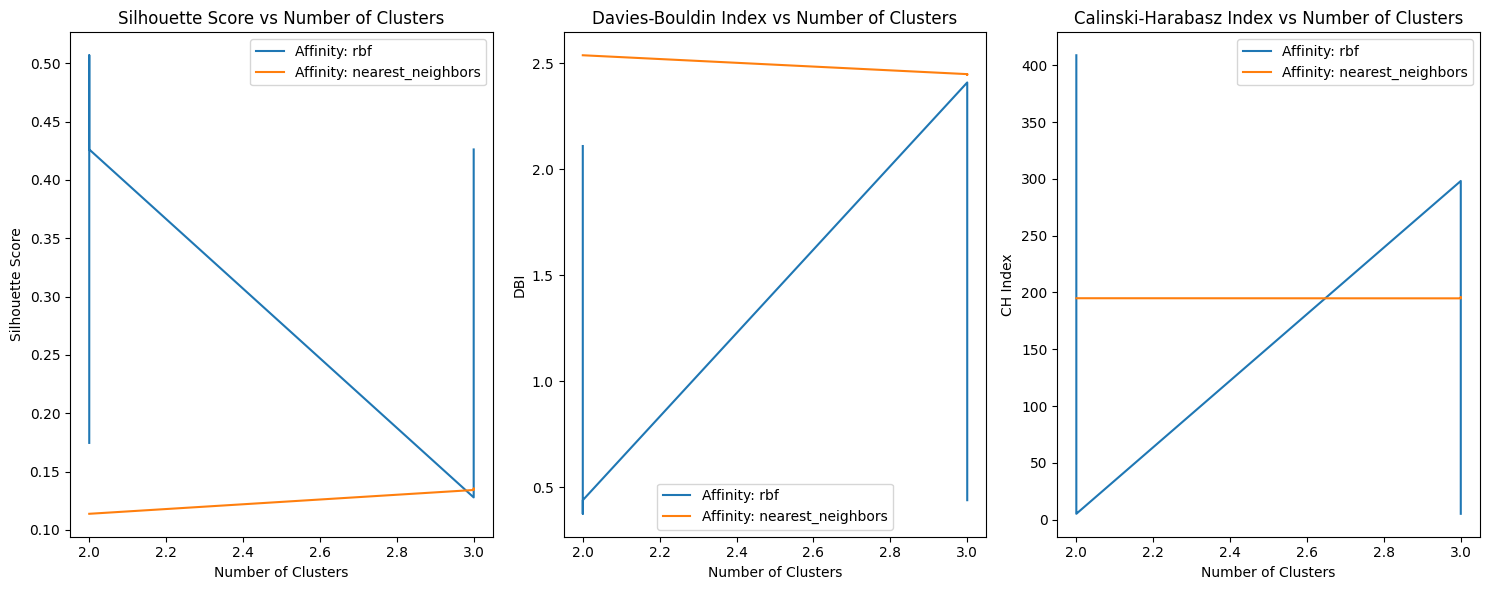

In [4]:
import matplotlib.pyplot as plt

# Plot metrics for different cluster numbers
plt.figure(figsize=(15, 6))

# Silhouette Score
plt.subplot(1, 3, 1)
for affinity in affinity_types:
    subset = results_df[results_df['affinity'] == affinity]
    plt.plot(subset['n_clusters'], subset['Silhouette_Score'], label=f'Affinity: {affinity}')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

# Davies-Bouldin Index
plt.subplot(1, 3, 2)
for affinity in affinity_types:
    subset = results_df[results_df['affinity'] == affinity]
    plt.plot(subset['n_clusters'], subset['DBI'], label=f'Affinity: {affinity}')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DBI')
plt.legend()

# Calinski-Harabasz Index
plt.subplot(1, 3, 3)
for affinity in affinity_types:
    subset = results_df[results_df['affinity'] == affinity]
    plt.plot(subset['n_clusters'], subset['CH'], label=f'Affinity: {affinity}')
plt.title('Calinski-Harabasz Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('CH Index')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
best_silhouette

n_clusters                 2
affinity                 rbf
gamma                    1.0
n_neighbors              NaN
Silhouette_Score    0.506846
DBI                 0.373773
CH                  6.922085
Name: 1, dtype: object

In [11]:
best_ch

n_clusters                   2
affinity                   rbf
gamma                      0.1
n_neighbors                NaN
Silhouette_Score       0.17461
DBI                   2.108988
CH                  408.992158
Name: 0, dtype: object

In [12]:
best_dbi

n_clusters                 2
affinity                 rbf
gamma                    1.0
n_neighbors              NaN
Silhouette_Score    0.506846
DBI                 0.373773
CH                  6.922085
Name: 1, dtype: object

In [13]:
# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='rbf',gamma=0.1)  # Choose the number of clusters
labels = spectral.fit_predict(X_pca)

# Evaluate clustering quality
silhouette_avg = silhouette_score(X_pca, labels)
db_index = davies_bouldin_score(X_pca, labels)
ch_index = calinski_harabasz_score(X_pca, labels)
print(f"The average silhouette score for GMM is: {silhouette_avg}")
print(f"The Davies-Bouldin Index for GMM is: {db_index}")
print(f"The Calinski-Harabasz Index for GMM is: {ch_index}")

The average silhouette score for GMM is: 0.17461026427256035
The Davies-Bouldin Index for GMM is: 2.108988298045924
The Calinski-Harabasz Index for GMM is: 408.99215841810525


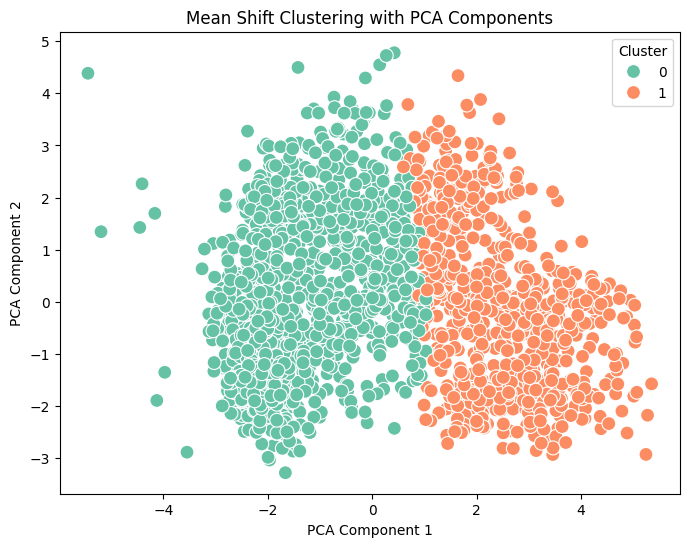

In [14]:
# Visualize the Mean Shift Clustering in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=X_pca[0], y=X_pca[1], hue=labels, palette='Set2', s=100)

plt.title('Mean Shift Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()